In [1]:
#| parameters
fiber_folder = "fiber1"

In [2]:

# Injected Parameters
fiber_folder = "O_50_0000_0000"


In [3]:
from IPython.display import display, Markdown

display(Markdown(f"# Fiber Datasheet for: {fiber_folder}"))

# Fiber Datasheet for: O_50_0000_0000

In [4]:
from IPython.display import display, Image
import os
import json
import sys

if sys.platform.startswith("linux"):
    BASE_PATH = r"/run/user/1002/gvfs/smb-share:server=srv4.local,share=labshare/raw_data/fibers/Measurements"
elif sys.platform.startswith("win"):
    BASE_PATH = r"\\srv4\labshare\raw_data\fibers\Measurements"

base_path = BASE_PATH
fiber_path = os.path.join(base_path, fiber_folder)
dirlist = os.listdir(fiber_path)



with open(os.path.join(fiber_path, "fiber_data.json")) as f:
    fiber_data = json.load(f)

display(Markdown("## Fiber Data"))
table = f"""
| **Name**        | {fiber_data['fiber_name']}               |
|-----------------------|------------------------------------------|
| **Dimensions [μm]**   | {fiber_data['fiber_dimension']}          |
| **Shape**        | {fiber_data['fiber_shape']}              |
| **Length [m]**       | {fiber_data['fiber_length']}             |
| **Numerical Aperture** | {fiber_data['numerical_aperature']}      |
| **Coating Type**       | {fiber_data['coating_type']}             |
| **Manufacturer**       | {fiber_data['manufacturer']}             |
"""

display(Markdown(table))

## Fiber Data


| **Name**        | O_50_0000_0000               |
|-----------------------|------------------------------------------|
| **Dimensions [μm]**   | 50          |
| **Shape**        | octagonal              |
| **Length [m]**       | 4             |
| **Numerical Aperture** | 0.22      |
| **Coating Type**       | Polyimide             |
| **Manufacturer**       |              |


In [5]:
from IPython.display import display, HTML


if "fiber_polishing" in dirlist:
    display(Markdown("## Polished End-Faces:"))
    polishing_images = os.path.join(fiber_path, "fiber_polishing")
    img_list = os.listdir(polishing_images)
    img_paths = []

    if any("step5" in item for item in img_list):
        img_paths = [os.path.join(polishing_images, i) for i in img_list if "step5" in i]
    else:
        img_paths = [os.path.join(polishing_images, i) for i in img_list if "step4" in i]

    from IPython.display import display, Latex

    latex_str = r"""
    \begin{center}
    \includegraphics[width=0.4\textwidth]{""" + img_paths[0].replace('\\', '/') + r"""}
    \hspace{1cm}
    \includegraphics[width=0.4\textwidth]{""" + img_paths[1].replace('\\', '/') + r"""}
    \end{center}
    """
    
    display(Latex(latex_str))
    display(Markdown(r"\newpage"))

## Polished End-Faces:

<IPython.core.display.Latex object>

\newpage

## FRD Results:

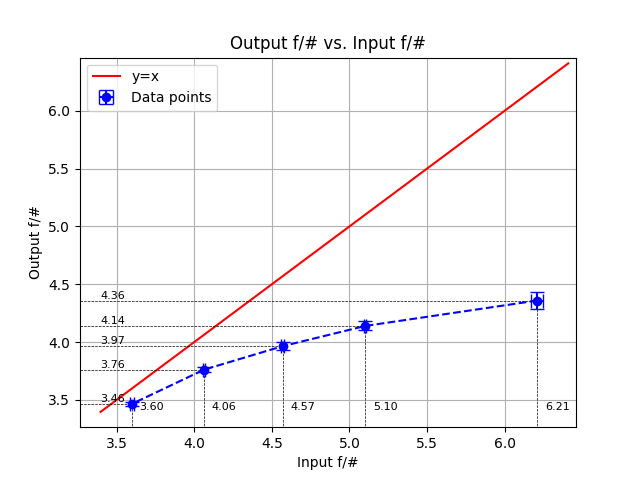

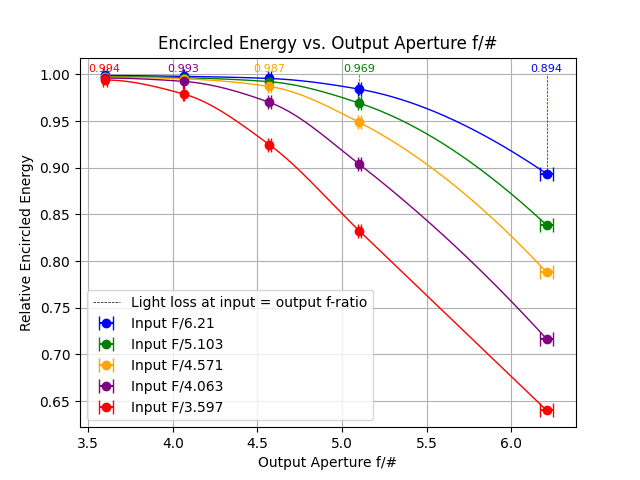

### Farfield of the fiber with virtual aperature:

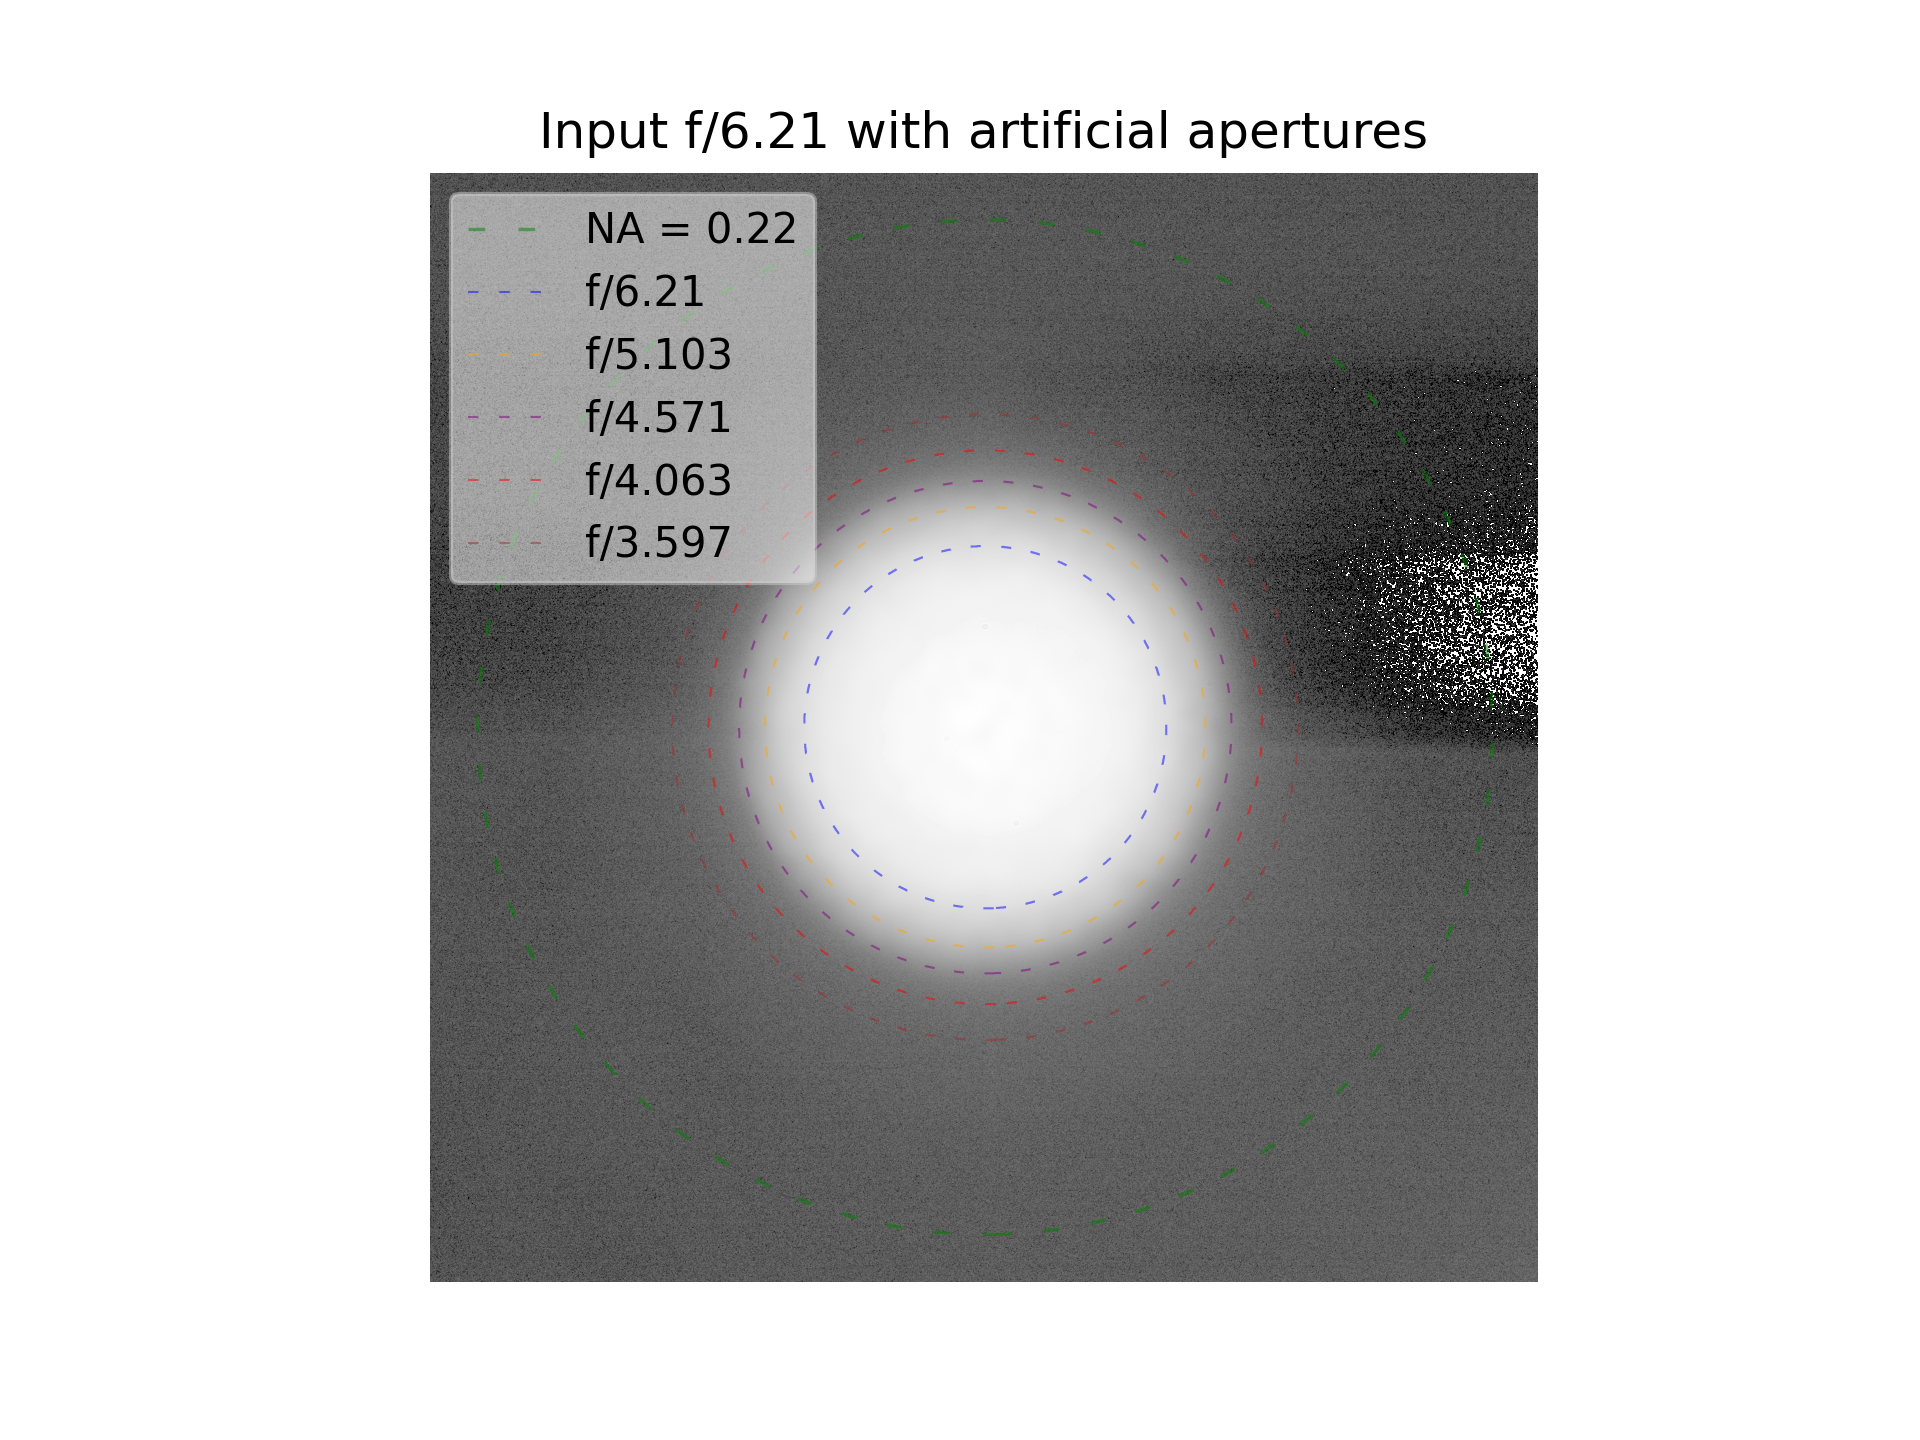

### Horizontal Farfield Cut:

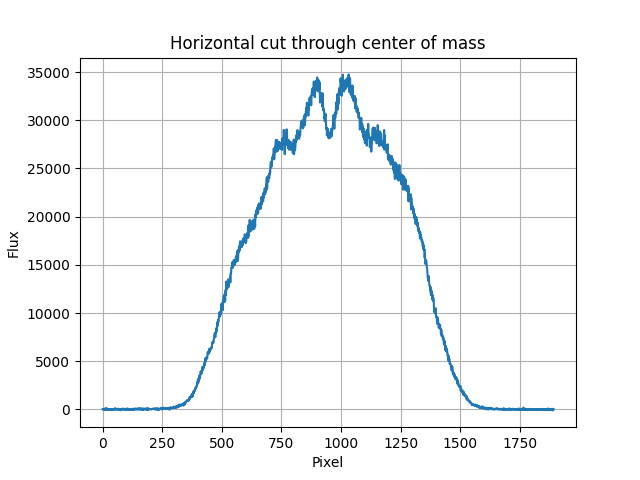

\newpage

In [6]:
if "FRD" in dirlist:
    frd_path = os.path.join(fiber_path, "FRD")
    display(Markdown("## FRD Results:"))
    display(Image(filename=os.path.join(frd_path, "f_number_vs_input.png")))
    display(Image(filename=os.path.join(frd_path, "encircled_energy_vs_output.png")))
    if "filter_2" in os.listdir(frd_path):
        filter_2_path = os.path.join(frd_path, "filter_2")
        filter_2_f_ratio_path = os.path.join(filter_2_path, "f_ratio_images")
        if "input_6.21_with_artificial_apertures.png" in os.listdir(filter_2_f_ratio_path):
            display(Markdown("### Farfield of the fiber with virtual aperature:"))
            display(Image(filename=os.path.join(filter_2_f_ratio_path, "input_6.21_with_artificial_apertures.png")))
        if "f_ratio_6.21.png" in os.listdir(filter_2_f_ratio_path):
            display(Markdown("### Farfield of the fiber with virtual aperature:"))
            display(Image(filename=os.path.join(filter_2_f_ratio_path, "f_ratio_6.21.png")))       
        if "plots" in os.listdir(filter_2_f_ratio_path):
            display(Markdown("### Horizontal Farfield Cut:"))
            display(Image(filename=os.path.join(filter_2_f_ratio_path, "plots", "horizontal_cut.png")))
            
    if "filter_6.0" in os.listdir(frd_path):
        filter_6_path = os.path.join(frd_path, "filter_6.0")
        filter_f_ratio_path = os.path.join(filter_6_path, "f_ratio_images")
        if "input_6.21_with_artificial_apertures.png" in os.listdir(filter_f_ratio_path):
            display(Markdown("### Farfield of the fiber with virtual aperature:"))
            display(Image(filename=os.path.join(filter_f_ratio_path, "input_6.21_with_artificial_apertures.png")))
        if "plots" in os.listdir(filter_6_path):
            display(Markdown("### Horizontal Farfield Cut:"))
            display(Image(filename=os.path.join(filter_6_path, "plots", "horizontal_cut.png")))
    display(Markdown(r"\newpage"))
    

## Scrambling Gain Results:

### Minimum Scrambling Gain: $\:\: SG_{min}$ = 455

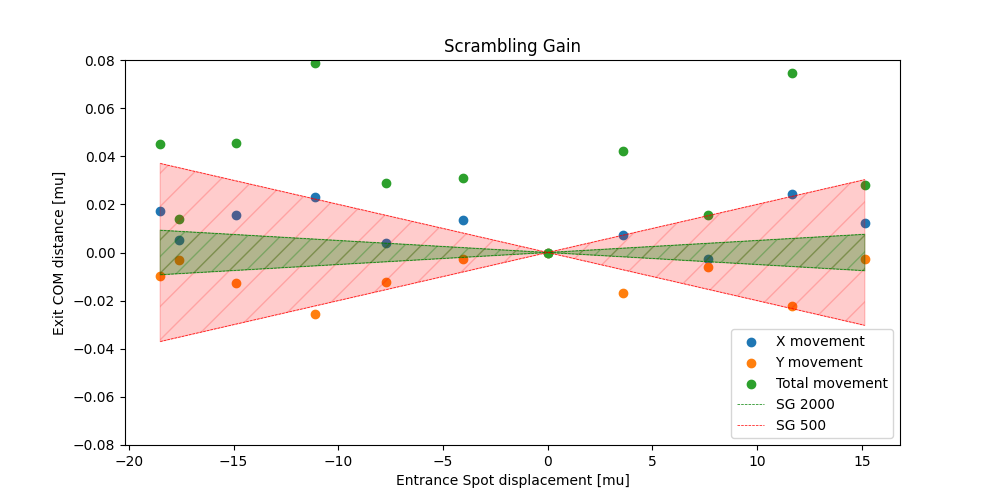

### Horizontal Nearfield Cut:

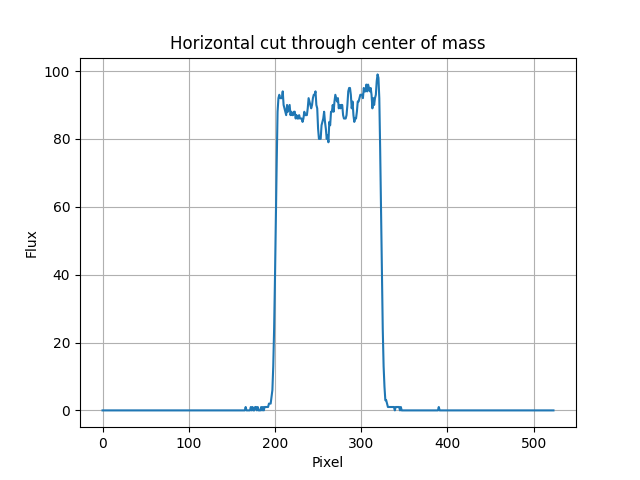

\newpage

In [7]:
if "SG" in dirlist:
    sg_path = os.path.join(fiber_path, "SG")
    sg_plots = os.path.join(sg_path, "plots")
    display(Markdown("## Scrambling Gain Results:"))
    with open(os.path.join(sg_path, "scrambling_gain_new.json")) as f:
        sg_data = json.load(f)
    display(Markdown(f"### Minimum Scrambling Gain: $\:\: SG_{{min}}$ = {sg_data['sg_min']}"))
    display(Image(filename=os.path.join(sg_plots, "scrambling_gain_plot.png")))
    
    if "horizontal_cut.png" in os.listdir(sg_plots):
        display(Markdown(f"### Horizontal Nearfield Cut:"))
        display(Image(filename=os.path.join(sg_plots, "horizontal_cut.png")))
    
    display(Markdown(r"\newpage"))

In [8]:
if "Throughput" in dirlist:
    tp_path = os.path.join(fiber_path, "Throughput")
    display(Markdown("## Throughput Results:"))
    display(Image(filename=os.path.join(tp_path, "throughput.png")))